In [1]:
import torch.utils.data as dt
import torch
from carvana_dataset import CarvanaDataset, class_max
from train import trainig
from model import SegmenterModel
from random import randint
from torch.autograd import Variable
from show import show_result
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DEVICE_ID = 0
DEVICE = torch.device('cuda:%d' % DEVICE_ID)
torch.cuda.set_device(DEVICE_ID)

### Learning

In [3]:
net = SegmenterModel()
#print(net)
train_loss, test_loss = trainig(net, n_epoch = 100)

/home/a.chesnov/NN_Mail.ru/05/seg_hw/train.py:59: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  epoch_train_loss += loss.data[0]
/home/a.chesnov/NN_Mail.ru/05/seg_hw/train.py:67: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  i = Variable(i, volatile = True)
/home/a.chesnov/NN_Mail.ru/05/seg_hw/train.py:69: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  t = Variable(t, volatile = True)
/home/a.chesnov/NN_Mail.ru/05/seg_hw/train.py:75: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  epoch_test_loss += loss.data[0]


Current epoch: 0    Train loss = 0.03384    Test Loss = 0.18763
Current epoch: 1    Train loss = 0.02200    Test Loss = 0.02174
Current epoch: 2    Train loss = 0.01476    Test Loss = 0.01438
Current epoch: 3    Train loss = 0.01056    Test Loss = 0.01226
Current epoch: 4    Train loss = 0.00911    Test Loss = 0.00970
Current epoch: 5    Train loss = 0.00774    Test Loss = 0.00897
Current epoch: 6    Train loss = 0.00717    Test Loss = 0.00653
Current epoch: 7    Train loss = 0.00628    Test Loss = 0.00662
Current epoch: 8    Train loss = 0.00572    Test Loss = 0.00615
Current epoch: 9    Train loss = 0.00522    Test Loss = 0.00495
Current epoch: 10    Train loss = 0.00510    Test Loss = 0.00516
Current epoch: 11    Train loss = 0.00476    Test Loss = 0.00475
Current epoch: 12    Train loss = 0.00470    Test Loss = 0.00447
Current epoch: 13    Train loss = 0.00445    Test Loss = 0.00488
Current epoch: 14    Train loss = 0.00433    Test Loss = 0.00429
Current epoch: 15    Train loss = 0

### Results

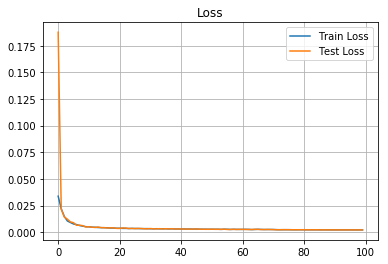

In [4]:
plt.title('Loss')
plt.grid(True)
plt.plot([float(e) for e in train_loss], label = 'Train Loss')
plt.plot([float(e) for e in test_loss], label = 'Test Loss', zorder=10)
plt.legend()

In [5]:
def show(net):
    test       = './data/test/'
    test_masks = './data/test_masks'
    ds_test = CarvanaDataset(test, test_masks)

    for _ in range(3):
        img, img_mask = ds_test[randint(0, 300)]

        input_ = Variable(img.unsqueeze_(0)).cuda()
        output = net(input_)

        img_mask_temp = class_max(output)
        show_result((img.squeeze_(0), img_mask, img_mask_temp), figsize=(10,30))

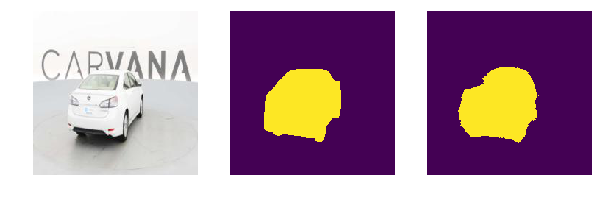

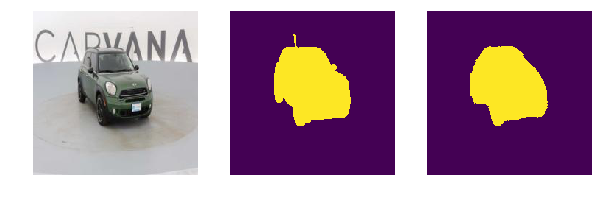

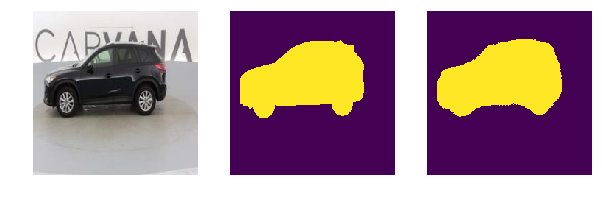

In [6]:
show(net)

In [7]:
#torch.cuda.empty_cache()

In [8]:
torch.save(net, './model')
torch.save(net.state_dict(), './state')